In [1]:
import pandas as pd
from pathlib import Path
import matplotlib as plt
import numpy as np
import sqlalchemy
import yfinance as yf
import yahoo_fin.stock_info as si
import os
import panel as pn


In [2]:
# Using the Pandas read_csv funcion and the Path module, 
# read "sp500_sustainability_scores.csv" file into a Pandas DataFrame
esg_df = pd.read_csv(
    Path("sp500_sustainability_scores.csv")
)

# Review the DataFrame
esg_df.head()

,Unnamed: 0,palmOil,controversialWeapons,gambling,socialScore,nuclear,furLeather,alcoholic,gmo,catholic,...,coal,pesticides,adult,percentile,peerGroup,smallArms,environmentScore,governancePercentile,militaryContract,company_ticker
0,Value,False,False,False,8.65,False,False,False,False,True,...,False,False,False,10.48,Pharmaceuticals,False,0.34,0,False,A
1,Value,False,False,False,12.31,False,False,False,False,False,...,False,False,False,58.47,Transportation,False,11.53,0,False,AAL
2,Value,False,False,False,9.17,False,False,False,False,False,...,False,False,False,5.74,Retailing,False,0.10,0,False,AAP
3,Value,False,False,False,6.86,False,False,False,False,False,...,False,False,False,12.87,Technology Hardware,False,0.65,0,False,AAPL
4,Value,False,False,False,16.92,False,False,False,False,True,...,False,False,False,53.78,Pharmaceuticals,False,1.12,0,False,ABBV


In [3]:
# Create the connection string for your SQLite database
database_connection_string = 'sqlite:///'

# Pass the connection string to the SQLAlchemy create_engine function
engine = sqlalchemy.create_engine(database_connection_string)

# Confirm that the database engine was created.
engine

Engine(sqlite:///)

In [4]:
esg_df_1 = esg_df[['company_ticker', 'environmentScore', 'socialScore', 'governanceScore']]

In [5]:
esg_df_1

,company_ticker,environmentScore,socialScore,governanceScore
0,A,0.34,8.65,6.34
1,AAL,11.53,12.31,5.38
2,AAP,0.10,9.17,3.70
3,AAPL,0.65,6.86,8.76
4,ABBV,1.12,16.92,9.98
...,...,...,...,...
441,XRAY,3.15,10.42,6.55
442,XYL,3.30,7.58,5.08
443,YUM,3.90,13.08,4.70
444,ZBH,4.53,13.62,9.93


In [6]:
#esg_df.to_sql(
esg_df[['company_ticker', 'environmentScore', 'socialScore', 'governanceScore']].to_sql(
    'esg_score_info', #New table name
    engine, 
    index=False, 
    if_exists='replace'
)

# Confirm that the table was created by calling the table_names function
engine.table_names()

C:\Projects\Softwares\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:10: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  # Remove the CWD from sys.path while we load stuff.


['esg_score_info']

In [7]:
# e_score = 10
# s_score = 10
# g_score = 8

# Create and execute a query to return all columns for the 10 highest credit scores.
# query1 = """
# SELECT company_ticker, environmentScore, socialScore, governanceScore
# FROM esg_score_info
# WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
# """

## , environmentScore, socialScore, governanceScore

# Call on the database engine to execute the query
# results = engine.execute(query1)

# List of the results of the database query
# list(results)

# Create a custom index for FILTERED stock in the S&P500

In [8]:


e_score = 10
s_score = 10
g_score = 5

# Create and execute a query to return esg data for tickers that match the chosen criteria.
query1 = """
SELECT company_ticker, environmentScore, socialScore, governanceScore
FROM esg_score_info
WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
"""

# read in your SQL query results using pandas
esg_df = pd.read_sql(query1, con=engine)

# return your first five rows
esg_df

,company_ticker,environmentScore,socialScore,governanceScore
0,AAL,11.53,12.31,5.38
1,ADM,18.23,13.16,5.04
2,ATO,12.80,12.31,6.67
3,CTRA,23.39,14.01,9.28
4,CVX,22.42,10.86,9.95
5,EIX,10.49,10.57,6.36
6,FCX,18.50,10.54,5.45
7,FMC,17.86,13.54,7.25
8,FTV,15.63,13.91,5.32
9,GE,14.09,15.04,11.58


In [9]:
esg_ticker = esg_df['company_ticker']

#Download historical data for S&P 500
sp500_hist_data = yf.download(list(esg_ticker), start="2020-01-01", end="2020-04-30")
sp500_hist_data_closing = sp500_hist_data[['Adj Close']]
#sp500_hist_data
#Count the number of column fetched
#column_count = (len(sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
#sp500_hist_data_closing = sp500_hist_data.iloc[:,0:int(column_count)]

#Print the data frame to make sure the data is fetched correctly
#sp500_hist_data_closing

[*********************100%***********************]  29 of 29 completed


In [10]:
#Count the number of column fetched
#column_count = (len(sp500_hist_data_closing.columns))/6
#column_count
len(sp500_hist_data_closing.columns)

29

In [11]:
sp500_hist_data_closing

Adj Close                                                \
                  AAL        ADM         ATO       CTRA         CVX   
Date                                                                  
2020-01-02  28.982893  43.316338  104.394745  15.914399  108.060593   
2020-01-03  27.548195  43.231796  105.085159  15.960580  107.686829   
2020-01-06  27.219410  42.893612  104.943283  16.089890  107.321968   
2020-01-07  27.119778  42.376930  105.643166  16.182255  105.951523   
2020-01-08  27.737495  41.907227  104.735214  15.563415  104.741257   
...               ...        ...         ...        ...         ...   
2020-04-23  10.250000  33.838768   96.299889  18.630585   78.146164   
2020-04-24  10.310000  34.075462   99.226997  19.002449   78.335228   
2020-04-27  10.020000  34.596203  100.310402  19.606735   80.766029   
2020-04-28  11.260000  35.192688  101.830986  19.095415   80.946098   
2020-04-29  12.630000  36.366730   99.654663  19.309242   85.186516   

                                                                   ...  \
                  EIX        FCX        FMC        FTV         GE  ...   
Date                                                               ...   
2020-01-02  67.924850  13.023603  96.217072  64.385872  94.659431  ...   
2020-01-03  68.290154  12.628950  95.590912  64.120186  94.976822  ...   
2020-01-06  68.609772  12.678281  94.752838  63.788086  96.325699  ...   
2020-01-07  69.276421  12.875607  96.477173  63.995659  95.611580  ...   
2020-01-08  69.166832  13.003871  96.766167  63.937519  94.738792  ...   
...               ...        ...        ...        ...        ...  ...   
2020-04-23  53.796432   7.734214  84.651985  48.700821  51.784779  ...   
2020-04-24  54.738773   8.397712  85.456169  50.146885  49.719742  ...   
2020-04-27  56.124561   8.764123  87.568336  53.171986  51.069962  ...   
2020-04-28  57.454926   8.833443  88.062469  53.778664  54.008667  ...   
2020-04-29  55.773495   9.170144  92.063988  54.476765  52.261330  ...   

                                                                     \
                  NUE        OXY         SJM         SO         TDG   
Date                                                                  
2020-01-02  52.096642  41.184013   95.423317  57.002628  567.440002   
2020-01-03  51.406689  42.180241   95.563469  56.948006  577.840027   
2020-01-06  50.971912  43.573029   96.890076  57.175579  584.799988   
2020-01-07  50.858498  43.785816   95.526085  57.002628  587.000000   
2020-01-08  50.735634  43.505329   96.507034  56.984413  585.630005   
...               ...        ...         ...        ...         ...   
2020-04-23  36.086987  13.821795  110.012985  52.169846  314.279999   
2020-04-24  36.230488  13.762003  110.945389  53.024033  304.920013   
2020-04-27  38.746632  14.100821  113.817909  53.712894  317.450012   
2020-04-28  38.737061  15.117276  111.736496  53.327129  336.649994   
2020-04-29  40.660046  16.721680  107.545448  52.693382  371.179993   

                                                                   
                  TSN        TXT        UAL        WAB        XOM  
Date                                                               
2020-01-02  85.615982  45.326580  89.739998  79.925674  61.174892  
2020-01-03  86.196465  44.589085  87.900002  79.313522  60.683075  
2020-01-06  85.787270  44.628948  87.699997  78.987686  61.149014  
2020-01-07  84.540657  44.609016  86.769997  78.958076  60.648567  
2020-01-08  85.064049  44.021004  87.300003  77.605408  59.733971  
...               ...        ...        ...        ...        ...  
2020-04-23  58.297218  27.744507  25.719999  51.428062  38.028339  
2020-04-24  56.459270  26.956652  25.559999  52.842068  38.273399  
2020-04-27  57.129360  28.083584  25.000000  53.820992  38.457195  
2020-04-28  60.116016  28.941252  27.840000  55.689842  39.358673  
2020-04-29  60.594639  29.938538  31.209999  58.517841  41.537975  

[82 rows x 29 columns]

In [12]:
#Create the "Custom_Index" column to calculate the average price of all the filtered stock
sp500_hist_data_closing['custom_index_average_close'] = sp500_hist_data_closing.mean(axis=1)
sp500_hist_data_closing

C:\Projects\Softwares\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Adj Close                                                \
                  AAL        ADM         ATO       CTRA         CVX   
Date                                                                  
2020-01-02  28.982893  43.316338  104.394745  15.914399  108.060593   
2020-01-03  27.548195  43.231796  105.085159  15.960580  107.686829   
2020-01-06  27.219410  42.893612  104.943283  16.089890  107.321968   
2020-01-07  27.119778  42.376930  105.643166  16.182255  105.951523   
2020-01-08  27.737495  41.907227  104.735214  15.563415  104.741257   
...               ...        ...         ...        ...         ...   
2020-04-23  10.250000  33.838768   96.299889  18.630585   78.146164   
2020-04-24  10.310000  34.075462   99.226997  19.002449   78.335228   
2020-04-27  10.020000  34.596203  100.310402  19.606735   80.766029   
2020-04-28  11.260000  35.192688  101.830986  19.095415   80.946098   
2020-04-29  12.630000  36.366730   99.654663  19.309242   85.186516   

                                                                   ...  \
                  EIX        FCX        FMC        FTV         GE  ...   
Date                                                               ...   
2020-01-02  67.924850  13.023603  96.217072  64.385872  94.659431  ...   
2020-01-03  68.290154  12.628950  95.590912  64.120186  94.976822  ...   
2020-01-06  68.609772  12.678281  94.752838  63.788086  96.325699  ...   
2020-01-07  69.276421  12.875607  96.477173  63.995659  95.611580  ...   
2020-01-08  69.166832  13.003871  96.766167  63.937519  94.738792  ...   
...               ...        ...        ...        ...        ...  ...   
2020-04-23  53.796432   7.734214  84.651985  48.700821  51.784779  ...   
2020-04-24  54.738773   8.397712  85.456169  50.146885  49.719742  ...   
2020-04-27  56.124561   8.764123  87.568336  53.171986  51.069962  ...   
2020-04-28  57.454926   8.833443  88.062469  53.778664  54.008667  ...   
2020-04-29  55.773495   9.170144  92.063988  54.476765  52.261330  ...   

                                                                     \
                  OXY         SJM         SO         TDG        TSN   
Date                                                                  
2020-01-02  41.184013   95.423317  57.002628  567.440002  85.615982   
2020-01-03  42.180241   95.563469  56.948006  577.840027  86.196465   
2020-01-06  43.573029   96.890076  57.175579  584.799988  85.787270   
2020-01-07  43.785816   95.526085  57.002628  587.000000  84.540657   
2020-01-08  43.505329   96.507034  56.984413  585.630005  85.064049   
...               ...         ...        ...         ...        ...   
2020-04-23  13.821795  110.012985  52.169846  314.279999  58.297218   
2020-04-24  13.762003  110.945389  53.024033  304.920013  56.459270   
2020-04-27  14.100821  113.817909  53.712894  317.450012  57.129360   
2020-04-28  15.117276  111.736496  53.327129  336.649994  60.116016   
2020-04-29  16.721680  107.545448  52.693382  371.179993  60.594639   

                                                        \
                  TXT        UAL        WAB        XOM   
Date                                                     
2020-01-02  45.326580  89.739998  79.925674  61.174892   
2020-01-03  44.589085  87.900002  79.313522  60.683075   
2020-01-06  44.628948  87.699997  78.987686  61.149014   
2020-01-07  44.609016  86.769997  78.958076  60.648567   
2020-01-08  44.021004  87.300003  77.605408  59.733971   
...               ...        ...        ...        ...   
2020-04-23  27.744507  25.719999  51.428062  38.028339   
2020-04-24  26.956652  25.559999  52.842068  38.273399   
2020-04-27  28.083584  25.000000  53.820992  38.457195   
2020-04-28  28.941252  27.840000  55.689842  39.358673   
2020-04-29  29.938538  31.209999  58.517841  41.537975   

           custom_index_average_close  
                                       
Date                                   
2020-01-02                  78.075456  
2020-01-03  

In [13]:
sp500_hist_data_closing_only = sp500_hist_data_closing[['custom_index_average_close']]
sp500_hist_data_closing_only

,custom_index_average_close
,
Date,
2020-01-02,78.075456
2020-01-03,78.136220
2020-01-06,78.425455
2020-01-07,78.357036
2020-01-08,78.220098
...,...
2020-04-23,54.113582
2020-04-24,54.102393


In [14]:
#Create the "Custom_Index" column to calculate the average price of all the filtered stock
#sp500_hist_data_closing['custom_index'] = sp500_hist_data_closing.mean(axis=1)

#Select only the average price of all fetch stocks
position_of_avg_price = len(sp500_hist_data_closing.columns)

#Select only date and price
#sp500_hist_data_closing_only = sp500_hist_data_closing.iloc[:,int(position_of_avg_price)-1]

#Print the data frame to make sure the data is fetched correctly
#sp500_hist_data_closing_only

#Find the division factor to transform the data to base 100 for easy comparison
division_factor_filtered_sp500 = sp500_hist_data_closing_only.iloc[0]
division_factor_filtered_sp500
#Transform closing price into base 100 for easy comparison
#sp500_hist_data_closing_only = (sp500_hist_data_closing_only/division_factor_filtered_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
#sp500_hist_data_closing_only.head()

custom_index_average_close      78.075456
Name: 2020-01-02 00:00:00, dtype: float64

# Compute the index for ALL stocks in the S&P500

In [103]:
# Fetch the data for ALL S&P 500 as an index for comparison

# Create and execute a query to return the list of tickers for S&P 500
query_all_sp500 = """
SELECT company_ticker
FROM esg_score_info
"""

# read in your SQL query results using pandas
all_sp500_df = pd.read_sql(query_all_sp500, con=engine)
all_sp500_ticker = all_sp500_df['company_ticker']

#Download historical data for S&P 500
all_sp500_hist_data = yf.download(list(all_sp500_ticker), start="2020-01-01", end="2020-04-30")


[*********************100%***********************]  446 of 446 completed


In [104]:
all_sp500_hist_data

Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2020-01-02  84.799675  28.982893  155.478271  73.894341  80.137360  82.064133   
2020-01-03  83.438141  27.548195  155.488022  73.175934  79.376686  81.032074   
2020-01-06  83.684799  27.219410  152.932632  73.759010  80.003105  82.218468   
2020-01-07  83.941315  27.119778  151.118530  73.412117  79.546715  81.630089   
2020-01-08  84.770081  27.737495  149.382446  74.593040  80.110481  82.421021   
...               ...        ...         ...        ...        ...        ...   
2020-04-24  74.926369  10.310000  115.013756  69.783600  76.945122  85.932640   
2020-04-27  75.420937  10.020000  116.343956  69.832924  77.957687  87.947754   
2020-04-28  74.629639  11.260000  118.319695  68.700966  76.181107  86.736740   
2020-04-29  77.864090  12.630000  122.173378  70.957474  77.101624  86.552666   
2020-04-30        NaN        NaN         NaN        NaN        NaN        NaN   

                                                           ...     Volume  \
                  ABT         ACN        ADBE         ADI  ...        WTW   
Date                                                       ...              
2020-01-02  84.001160  203.776093  334.429993  116.062134  ...   465800.0   
2020-01-03  82.977119  203.436722  331.809998  114.019020  ...   411400.0   
2020-01-06  83.411850  202.108246  333.709991  112.679428  ...   620200.0   
2020-01-07  82.948128  197.744751  333.390015  115.242958  ...   443200.0   
2020-01-08  83.286255  198.132614  337.869995  116.283791  ...   486400.0   
...               ...         ...         ...         ...  ...        ...   
2020-04-24  91.640259  171.566666  344.100006  102.632477  ...  1441400.0   
2020-04-27  92.507370  175.448593  348.500000  104.676994  ...   873600.0   
2020-04-28  89.107147  174.402344  333.450012  104.270027  ...  1198800.0   
2020-04-29  89.906044  183.398193  349.170013  109.822174  ...  3863400.0   
2020-04-30        NaN         NaN         NaN         NaN  ...        NaN   

                                                                               \
                   WY       WYNN        XEL         XOM       XRAY        XYL   
Date                                                                            
2020-01-02  4973500.0  3006500.0  2915400.0  12456400.0  1556600.0   869500.0   
2020-01-03  3111000.0  1760500.0  2422500.0  17386900.0   910000.0   795100.0   
2020-01-06  2178600.0  1357900.0  2217100.0  20081900.0   751000.0   817300.0   
2020-01-07  2426200.0  1722100.0  1861100.0  17387700.0   792600.0   662200.0   
2020-01-08  2299800.0  1176200.0  4828900.0  15137700.0  1001500.0  1083200.0   
...               ...        ...        ...         ...        ...        ...   
2020-04-24  3279200.0  4982700.0  2868800.0  28653800.0  3112900.0  1346400.0   
2020-04-27  3557300.0  5905700.0  2752000.0  28274400.0  1987600.0  1143200.0   
2020-04-28  4365100.0  9126300.0  3176300.0  26545100.0  1799900.0  1102800.0   
2020-04-29  4741400.0  7076700.0  3760100.0  29502500.0  1975500.0  1613800.0   
2020-04-30        NaN        NaN        NaN         NaN        NaN        NaN   

                                             
                  YUM        ZBH        ZTS  
Date                                         
2020-01-02  1369900.0  1052400.0  1576700.0  
2020-01-03  1145500.0   963500.0  1274000.0  
2020-01-06  1454100.0   944100.0  2334100.0  
2020-01-07  1388600.0   907300.0  1224500.0  
2020-01-08  1521500.0   908800.0  1766700.0  
...               ...        ...        ...  
2020-04-24  2131900.0  1475900.0  1945400.0  
2020-04-27  1840100.0  1468900.0  2202200.0  
2020-04-28  2665900.0  1210100.0  3098400.0  
2020-04-29  3261300.0  1383300.0  2905300.0  
2020-04-30        NaN        NaN        NaN  

[83 rows x 2676 co

In [105]:
all_sp500_hist_data.to_csv('test.csv')

In [24]:
esg_ticker[0:]


0      AAL
1      ADM
2      ATO
3     CTRA
4      CVX
5      EIX
6      FCX
7      FMC
8      FTV
9       GE
10      GM
11     HRL
12     KHC
13     LUV
14     MMM
15    MNST
16     MOS
17     MRO
18      NI
19     NUE
20     OXY
21     SJM
22      SO
23     TDG
24     TSN
25     TXT
26     UAL
27     WAB
28     XOM
Name: company_ticker, dtype: object

In [69]:
df = pd.DataFrame([

    [1, 2, 3, 4],

    [5, 6, 7, 8],

    [9, 10, 11, 12]

])#.set_index([0, 1])#.rename_axis(['a', 'b'])

In [70]:
df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [73]:
df = pd.DataFrame([

    [1, 2, 3, 4],

    [5, 6, 7, 8],

    [9, 10, 11, 12]

]).set_index([0,1]).rename_axis(['a', 'b'])

In [74]:
df

,,2,3
a,b,,
1,2,3,4
5,6,7,8
9,10,11,12


In [75]:
df.columns = pd.MultiIndex.from_tuples([('c', 'e'), ('d', 'f')], names=['level_1', 'level_2'])

In [76]:
df

,level_1,c,d
,level_2,e,f
a,b,,
1,2,3,4
5,6,7,8
9,10,11,12


In [78]:
df.droplevel('level_2', axis=1)

,level_1,c,d
a,b,,
1,2,3,4
5,6,7,8
9,10,11,12


In [106]:
all_sp500_hist_data[['Adj Close']]

Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2020-01-02  84.799675  28.982893  155.478271  73.894341  80.137360  82.064133   
2020-01-03  83.438141  27.548195  155.488022  73.175934  79.376686  81.032074   
2020-01-06  83.684799  27.219410  152.932632  73.759010  80.003105  82.218468   
2020-01-07  83.941315  27.119778  151.118530  73.412117  79.546715  81.630089   
2020-01-08  84.770081  27.737495  149.382446  74.593040  80.110481  82.421021   
...               ...        ...         ...        ...        ...        ...   
2020-04-24  74.926369  10.310000  115.013756  69.783600  76.945122  85.932640   
2020-04-27  75.420937  10.020000  116.343956  69.832924  77.957687  87.947754   
2020-04-28  74.629639  11.260000  118.319695  68.700966  76.181107  86.736740   
2020-04-29  77.864090  12.630000  122.173378  70.957474  77.101624  86.552666   
2020-04-30        NaN        NaN         NaN        NaN        NaN        NaN   

                                                           ...              \
                  ABT         ACN        ADBE         ADI  ...         WTW   
Date                                                       ...               
2020-01-02  84.001160  203.776093  334.429993  116.062134  ...  198.851639   
2020-01-03  82.977119  203.436722  331.809998  114.019020  ...  198.900299   
2020-01-06  83.411850  202.108246  333.709991  112.679428  ...  199.143661   
2020-01-07  82.948128  197.744751  333.390015  115.242958  ...  198.734833   
2020-01-08  83.286255  198.132614  337.869995  116.283791  ...  198.958710   
...               ...         ...         ...         ...  ...         ...   
2020-04-24  91.640259  171.566666  344.100006  102.632477  ...  173.215149   
2020-04-27  92.507370  175.448593  348.500000  104.676994  ...  172.012924   
2020-04-28  89.107147  174.402344  333.450012  104.270027  ...  170.976883   
2020-04-29  89.906044  183.398193  349.170013  109.822174  ...  171.299423   
2020-04-30        NaN         NaN         NaN         NaN  ...         NaN   

                                                                               \
                   WY        WYNN        XEL        XOM       XRAY        XYL   
Date                                                                            
2020-01-02  26.965097  142.405029  59.119480  61.174892  55.990776  77.805450   
2020-01-03  27.010973  140.292755  59.403801  60.683083  55.371174  78.263412   
2020-01-06  26.955925  140.015091  59.318501  61.149014  55.676060  77.756737   
2020-01-07  26.781601  140.679504  59.195293  60.648575  55.971107  77.464417   
2020-01-08  26.882526  141.562103  59.138435  59.733971  56.561211  77.727501   
...               ...         ...        ...        ...        ...        ...   
2020-04-24  18.210421   76.610001  61.591362  38.273403  38.772247  66.972038   
2020-04-27  19.185480   82.769997  62.449848  38.457195  40.537762  69.171204   
2020-04-28  19.844809   82.160004  63.117554  39.358677  41.060509  71.800430   
2020-04-29  20.764151   89.029999  62.077843  41.537979  43.595356  72.122993   
2020-04-30        NaN         NaN        NaN        NaN        NaN        NaN   

                                               
                  YUM         ZBH         ZTS  
Date                                           
2020-01-02  98.132988  147.066025  132.432312  
2020-01-03  97.825638  146.681580  132.452087  
2020-01-06  97.768005  145.833908  131.435165  
2020-01-07  97.940895  145.705750  131.879471  
2020-01-08  98.113792  147.450439  131.593155  
...               ...         ...         ...  
2020-04-24  82.865990  115.069641  124.688225  
2020-04-27  85.085022  116.097328  126.183578  
2020-04-28  85.162186  113.379913  121.806480  
2020-04-29  84.380722  119.427361  124.331734  
2020-04-30        NaN    

In [107]:
#custom_sp500_hist_data = all_sp500_hist_data.drop(['Close', 'High', 'Low', 'Open', ], axis=1)

custom_sp500_hist_data =  all_sp500_hist_data[['Adj Close']].droplevel(0,axis=1)


In [108]:
custom_sp500_hist_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,84.799675,28.982893,155.478271,73.894341,80.137360,82.064133,84.001160,203.776093,334.429993,116.062134,...,198.851639,26.965097,142.405029,59.119480,61.174892,55.990776,77.805450,98.132988,147.066025,132.432312
2020-01-03,83.438141,27.548195,155.488022,73.175934,79.376686,81.032074,82.977119,203.436722,331.809998,114.019020,...,198.900299,27.010973,140.292755,59.403801,60.683083,55.371174,78.263412,97.825638,146.681580,132.452087
2020-01-06,83.684799,27.219410,152.932632,73.759010,80.003105,82.218468,83.411850,202.108246,333.709991,112.679428,...,199.143661,26.955925,140.015091,59.318501,61.149014,55.676060,77.756737,97.768005,145.833908,131.435165
2020-01-07,83.941315,27.119778,151.118530,73.412117,79.546715,81.630089,82.948128,197.744751,333.390015,115.242958,...,198.734833,26.781601,140.679504,59.195293,60.648575,55.971107,77.464417,97.940895,145.705750,131.879471
2020-01-08,84.770081,27.737495,149.382446,74.593040,80.110481,82.421021,83.286255,198.132614,337.869995,116.283791,...,198.958710,26.882526,141.562103,59.138435,59.733971,56.561211,77.727501,98.113792,147.450439,131.593155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,74.926369,10.310000,115.013756,69.783600,76.945122,85.932640,91.640259,171.566666,344.100006,102.632477,...,173.215149,18.210421,76.610001,61.591362,38.273403,38.772247,66.972038,82.865990,115.069641,124.688225
2020-04-27,75.420937,10.020000,116.343956,69.832924,77.957687,87.947754,92.507370,175.448593,348.500000,104.676994,...,172.012924,19.185480,82.769997,62.449848,38.457195,40.537762,69.171204,85.085022,116.097328,126.183578
2020-04-28,74.629639,11.260000,118.319695,68.700966,76.181107,86.736740,89.107147,174.402344,333.450012,104.270027,...,170.976883,19.844809,82.160004,63.117554,39.358677,41.060509,71.800430,85.162186,113.379913,121.806480


In [110]:
#custom_sp500_hist_data.to_csv('test2.csv')

In [126]:
#list1=list(esg_ticker)
#list1[0:10]
custom_sp500_hist_data[list(esg_ticker)]
#all_sp500_hist_data = custom_sp500_hist_data[[list(esg_ticker)]]
#all_sp500_hist_data


,AAL,ADM,ATO,CTRA,CVX,EIX,FCX,FMC,FTV,GE,...,NUE,OXY,SJM,SO,TDG,TSN,TXT,UAL,WAB,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,28.982893,43.316341,104.394737,15.914397,108.060577,67.927910,13.023604,96.217072,64.385857,94.659431,...,52.096634,41.184013,95.423309,57.002621,567.440002,85.615974,45.326588,89.739998,79.925682,61.174892
2020-01-03,27.548195,43.231792,105.085159,15.960582,107.686821,68.293213,12.628949,95.590919,64.120178,94.976822,...,51.406681,42.180244,95.563454,56.948006,577.840027,86.196457,44.589081,87.900002,79.313530,60.683083
2020-01-06,27.219410,42.893604,104.943298,16.089890,107.321968,68.612862,12.678281,94.752831,63.788086,96.325691,...,50.971916,43.573032,96.890076,57.175583,584.799988,85.787270,44.628944,87.699997,78.987701,61.149014
2020-01-07,27.119778,42.376923,105.643150,16.182255,105.951523,69.279526,12.875608,96.477173,63.995644,95.611588,...,50.858498,43.785820,95.526077,57.002621,587.000000,84.540665,44.609016,86.769997,78.958084,60.648575
2020-01-08,27.737495,41.907219,104.735222,15.563414,104.741257,69.169937,13.003872,96.766174,63.937531,94.738785,...,50.735630,43.505329,96.507042,56.984413,585.630005,85.064041,44.021004,87.300003,77.605415,59.733971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,10.310000,34.075459,99.227005,19.002449,78.335213,54.741234,8.397712,85.456154,50.146881,49.719742,...,36.230495,13.762004,110.945396,53.024033,304.920013,56.459270,26.956650,25.559999,52.842068,38.273403
2020-04-27,10.020000,34.596203,100.310410,19.606733,80.766037,56.127087,8.764123,87.568336,53.171978,51.069958,...,38.746628,14.100822,113.817909,53.712898,317.450012,57.129360,28.083584,25.000000,53.820992,38.457195
2020-04-28,11.260000,35.192688,101.830978,19.095417,80.946098,57.457504,8.833443,88.062485,53.778664,54.008667,...,38.737064,15.117277,111.736511,53.327129,336.649994,60.116013,28.941250,27.840000,55.689842,39.358677


In [86]:
#Count the number of column fetched
#all_sp500_column_count = (len(all_sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
#all_sp500_hist_data_closing = all_sp500_hist_data.iloc[:,0:int(all_sp500_column_count)]

#Print the data frame to make sure the data is fetched correctly
#all_sp500_hist_data_closing.head()


In [19]:
#Create the "Custom_Index" column to calculate the average price of ALL stock in S&P500
all_sp500_hist_data['sp500_average_close'] = all_sp500_hist_data.mean(axis=1)

#Select only the average price of all fetch stocks
#all_position_of_avg_price = len(all_sp500_hist_data_closing.columns)

#Select only date and price
#all_sp500_hist_data_closing_only = all_sp500_hist_data_closing.iloc[:,int(all_position_of_avg_price)-1]

#Find the division factor to transform the data to base 100 for easy comparison
#division_factor_all_sp500 = all_sp500_hist_data_closing_only.iloc[0]

#Transform closing price into base 100 for easy comparison
#all_sp500_hist_data_closing_only = (all_sp500_hist_data_closing_only/division_factor_all_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
#all_sp500_hist_data_closing_only.head()
all_sp500_hist_data

C:\Projects\Softwares\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2020-01-02  84.799667  28.982893  155.755661  73.894333  80.137337  82.064140   
2020-01-03  83.438141  27.548195  155.765427  73.175911  79.376694  81.032082   
2020-01-06  83.684799  27.219410  153.205475  73.758995  80.003113  82.218468   
2020-01-07  83.941322  27.119778  151.388123  73.412117  79.546722  81.630089   
2020-01-08  84.770065  27.737495  149.648926  74.593048  80.110489  82.421021   
...               ...        ...         ...        ...        ...        ...   
2020-04-24  74.926384  10.310000  115.218933  69.783592  76.945129  85.932640   
2020-04-27  75.420952  10.020000  116.551514  69.832924  77.957695  87.947739   
2020-04-28  74.629646  11.260000  118.530792  68.700966  76.181114  86.736740   
2020-04-29  77.864090  12.630000  122.391342  70.957466  77.101624  86.552673   
2020-04-30        NaN        NaN         NaN        NaN        NaN        NaN   

                                                           ...             \
                  ABT         ACN        ADBE         ADI  ...         WY   
Date                                                       ...              
2020-01-02  84.001160  203.776077  334.429993  116.062134  ...  26.965097   
2020-01-03  82.977112  203.436707  331.809998  114.019012  ...  27.010975   
2020-01-06  83.411858  202.108276  333.709991  112.679420  ...  26.955923   
2020-01-07  82.948151  197.744751  333.390015  115.242950  ...  26.781603   
2020-01-08  83.286255  198.132645  337.869995  116.283791  ...  26.882523   
...               ...         ...         ...         ...  ...        ...   
2020-04-24  91.640259  171.566696  344.100006  102.632469  ...  18.210421   
2020-04-27  92.507370  175.448593  348.500000  104.676994  ...  19.185482   
2020-04-28  89.107155  174.402344  333.450012  104.270020  ...  19.844809   
2020-04-29  89.906059  183.398193  349.170013  109.822166  ...  20.764151   
2020-04-30        NaN         NaN         NaN         NaN  ...        NaN   

                                                                               \
                  WYNN        XEL        XOM       XRAY        XYL        YUM   
Date                                                                            
2020-01-02  142.405029  59.119480  61.174892  55.990776  77.805450  98.132996   
2020-01-03  140.292755  59.403801  60.683075  55.371170  78.263412  97.825630   
2020-01-06  140.015091  59.318501  61.149010  55.676060  77.756729  97.768005   
2020-01-07  140.679504  59.195293  60.648563  55.971104  77.464417  97.940910   
2020-01-08  141.562103  59.138435  59.733963  56.561203  77.727501  98.113785   
...                ...        ...        ...        ...        ...        ...   
2020-04-24   76.610001  61.591362  38.273403  38.772251  66.972031  82.865990   
2020-04-27   82.769997  62.449844  38.457195  40.537758  69.171204  85.085014   
2020-04-28   82.160004  63.117554  39.358677  41.060513  71.800438  85.162186   
2020-04-29   89.029999  62.077839  41.537975  43.595356  72.122971  84.380714   
2020-04-30         NaN        NaN        NaN        NaN        NaN        NaN   

                                   sp500_average_close  
                   ZBH         ZTS                      
Date                                                    
2020-01-02  147.066025  132.432297          139.098707  
2020-01-03  146.681595  132.452057          138.560603  
2020-01-06  145.833908  131.435181          138.826582  
2020-01-07  145.705765  131.879440          138.689045  
2020-01-08  147.450439  131.593155          139.224907  
...                ...         ...                 ...  
2020-04-24  115.069633  124.688232          121.040344  
2020-04-27  116.097313  126.183571          123.633794  
2020-04-28  113.379913  121.806473  

In [20]:
all_sp500_hist_data_closing_only = all_sp500_hist_data[['sp500_average_close']] 
#all_sp500_hist_data_closing_only

daily_returns_all_sp500_hist_data_closing_only = all_sp500_hist_data_closing_only.pct_change().dropna()
daily_returns_all_sp500_hist_data_closing_only

,sp500_average_close
,
Date,
2020-01-03,-0.003869
2020-01-06,0.001920
2020-01-07,-0.000991
2020-01-08,0.003864
2020-01-09,0.005090
...,...
2020-04-24,0.014509
2020-04-27,0.021426


In [21]:
sp500_hist_data_closing_only

daily_returns_sp500_hist_data_closing_only = sp500_hist_data_closing_only.pct_change().dropna()
daily_returns_sp500_hist_data_closing_only

,custom_index_average_close
,
Date,
2020-01-03,0.000778
2020-01-06,0.003702
2020-01-07,-0.000872
2020-01-08,-0.001748
2020-01-09,0.006236
...,...
2020-04-23,0.012322
2020-04-24,-0.000207


# Combine the data to plot in a line graph


<AxesSubplot:title={'center':'The Price Index of S&P'}, xlabel='Date', ylabel='Price Index'>

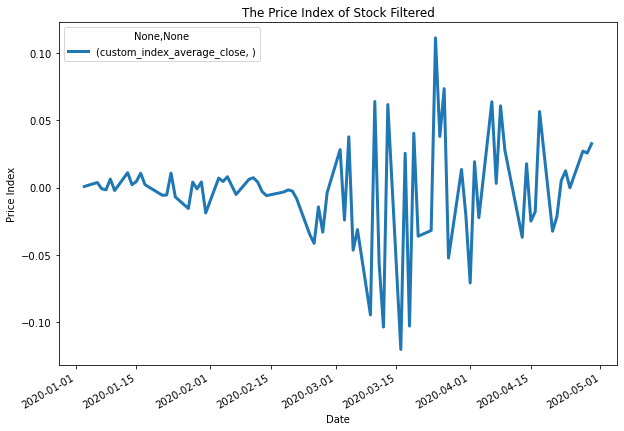

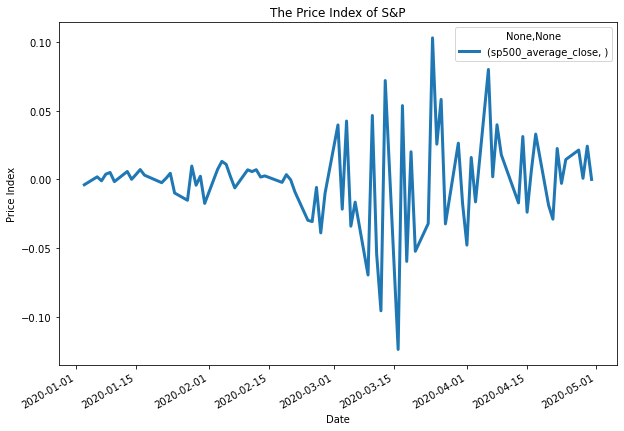

In [22]:
#Plot the filtered data frame
#sp500_hist_data_closing_only.plot(
daily_returns_sp500_hist_data_closing_only.plot(
    title="The Price Index of Stock Filtered", 
    xlabel="Date", 
    ylabel="Price Index", 
    figsize=(10,7),
    legend="top",
    label="Filtered Result",
    linewidth=3
)

#Plot the "ALL" S&P500 index data frame
#all_sp500_hist_data_closing_only.plot(
daily_returns_all_sp500_hist_data_closing_only.plot(
    title="The Price Index of S&P", 
    xlabel="Date", 
    ylabel="Price Index", 
    figsize=(10,7),
    legend="top",
    label="All S&P500 Benchmark",
    linewidth=3
)

In [23]:
daily_returns = pd.concat([daily_returns_all_sp500_hist_data_closing_only,daily_returns_sp500_hist_data_closing_only], axis=1)

In [28]:
daily_returns.columns  = ['daily_returns_all_sp500_', 'daily_returns_custom_sp500']

In [29]:
daily_returns

,daily_returns_all_sp500_,daily_returns_custom_sp500
Date,,
2020-01-03,-0.003869,0.000778
2020-01-06,0.001920,0.003702
2020-01-07,-0.000991,-0.000872
2020-01-08,0.003864,-0.001748
2020-01-09,0.005090,0.006236
...,...,...
2020-04-24,0.014509,-0.000207
2020-04-27,0.021426,0.027053
2020-04-28,0.000833,0.025585


<AxesSubplot:title={'center':'The Daily Returns of  Custom Index vs S&P500'}, xlabel='Date', ylabel='Price Index'>

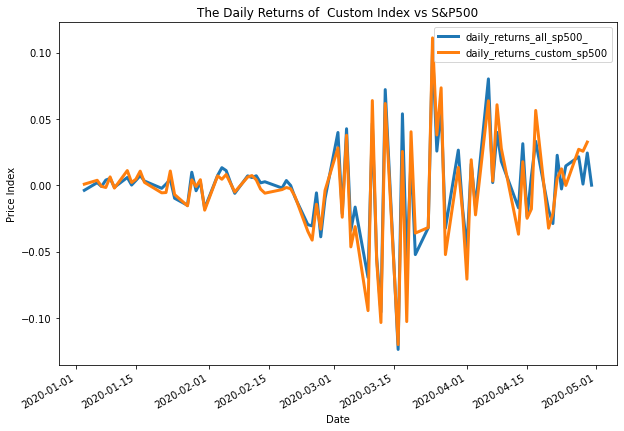

In [31]:
#sp500_hist_data_closing_only.plot(
daily_returns.plot(
    title="The Daily Returns of  Custom Index vs S&P500", 
    xlabel="Date", 
    ylabel="Price Index", 
    figsize=(10,7),
    legend="top",
    label="Filtered Result",
    linewidth=3
)

In [34]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns

,daily_returns_all_sp500_,daily_returns_custom_sp500
Date,,
2020-01-03,0.996131,1.000778
2020-01-06,0.998044,1.004483
2020-01-07,0.997055,1.003607
2020-01-08,1.000907,1.001853
2020-01-09,1.006002,1.008100
...,...,...
2020-04-24,0.870176,0.692950
2020-04-27,0.888821,0.711696
2020-04-28,0.889561,0.729905


<AxesSubplot:title={'center':'The Cumulative Returns of  Custom Index vs S&P500'}, xlabel='Date', ylabel='Price Index'>

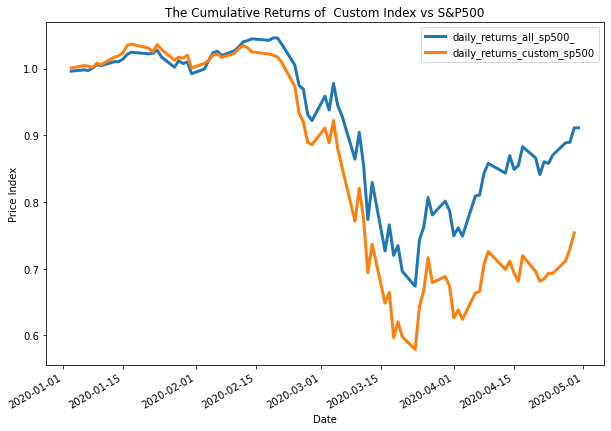

In [35]:
cumulative_returns.plot(
    title="The Cumulative Returns of  Custom Index vs S&P500", 
    xlabel="Date", 
    ylabel="Price Index", 
    figsize=(10,7),
    legend="top",
    label="Filtered Result",
    linewidth=3
)

In [27]:
# To do
# -------
# table and column name for industry
# integrate the SQL code with streamlit

In [140]:
    # Query for Filter Range Max Values - environmental score
    query_max_e_score_in_table = """
    SELECT environmentScore
    FROM esg_score_info
    ORDER By environmentScore DESC
    LIMIT  1
    """ 
    query_max_e_score_in_table_data = pd.read_sql_query(query_max_e_score_in_table, con=engine)
    max_e_score=query_max_e_score_in_table_data.iat[0,0]

    # Query for Filter Range Max Values - social score
    query_max_s_score_in_table = """
    SELECT socialScore
    FROM esg_score_info
    ORDER By socialScore DESC
    LIMIT  1
    """ 
    query_max_s_score_in_table_data = pd.read_sql_query(query_max_s_score_in_table, con=engine)
    max_s_score=query_max_s_score_in_table_data.iat[0,0]
    
    
    # Query for Filter Range Max Values - social score
    query_max_g_score_in_table = """
    SELECT governanceScore
    FROM esg_score_info
    ORDER By governanceScore DESC
    LIMIT  1
    """ 
    query_max_g_score_in_table_data = pd.read_sql_query(query_max_g_score_in_table, con=engine)
    max_g_score=query_max_g_score_in_table_data.iat[0,0]

In [141]:
max_g_score

15.51

In [142]:
max_e_score

24.61

In [143]:
max_s_score

21.01